In [32]:
class Config:
    N = 100
    M = 100
    N_P = 4

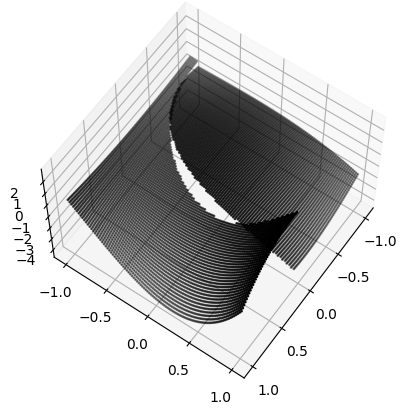

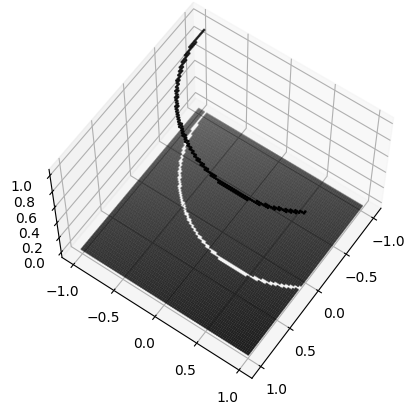

In [75]:
import numpy as np
import matplotlib.pyplot as plt
class DataGenerator:
    @staticmethod
    def Legendre(x, N):
        xp = x.reshape(1, -1)
        n = xp.shape[1]
        PL = np.zeros((N+ 1, n))

        gamma0 = 2
        PL[0, :] = 1.0/np.sqrt(gamma0)
        if N == 0:
            return PL.T

        gamma1 = 1/3* gamma0

        PL[1, :] = xp/np.sqrt(gamma1)

        if N == 1:
            return PL[N, :].reshape(-1, 1)

        aold =  np.sqrt(1 /3)
        for i in range(N - 1):
            h1 = 2*(i + 1) 
            anew = 2/(h1 + 2) * np.sqrt((i + 2) * (i+2) * (i + 2) *(i + 2)/(h1 + 1)/(h1 + 3))
            PL[i + 2, : ] = 1/(anew) *(-aold * PL[i, :] + (xp) *PL[i + 1, :])
            aold = anew
        return PL[N, :].reshape(-1, 1)
    @staticmethod
    def getLegendList():
        return [lambda x, i_ = i : DataGenerator.Legendre(x, i_) for i in range(Config.N_P)]

    @staticmethod
    def getFunc():
        LegendXList  = DataGenerator.getLegendList()
        data = [np.random.uniform(-1, 1) for _ in range(Config.N_P ** 2)]
        return lambda x, y: sum([data[ Config.N_P* i + j] * LegendXList[i](x) * LegendXList[j](y) for i in range(Config.N_P) for j in range(Config.N_P)])


    @staticmethod
    def getLineDiscontData():
        theta = np.random.uniform(0, 2 * np.pi)
        x_0, y_0 = np.random.uniform(0, 1), np.random.uniform(0, 1)
        # cos(theta) * (x - x_0) + sin(theta)(y- y_0) = 0
        h = 1/Config.N
        fun1 = DataGenerator.getFunc()
        fun2 = DataGenerator.getFunc()
        x = np.linspace(0, 1, Config.N + 1)
        y = np.linspace(0, 1, Config.N + 1)
        xx,yy = np.meshgrid(x, y)
        # xx = xx[:-1, :-1]
        # yy = yy[:-1, :-1]
        val1 = fun1(xx, yy).reshape(xx.shape)
        val2 = fun2(xx,yy).reshape(yy.shape)
        val  = np.where((xx - x_0)*np.cos(theta) + (yy - y_0)*np.sin(theta)<=0,val1, val2)
        xx = xx[:-1, :-1]
        yy = yy[:-1, :-1]
        return val, np.abs((xx + h/2 - x_0)*np.cos(theta) + (yy + h/2 - y_0)*np.sin(theta)) < 1e-2


    @staticmethod
    def getCircDiscontData():
        r = np.random.uniform(0, 1)
        x_0 , y_0 = np.random.uniform(0, 1) , np.random.uniform(0, 1)
        h = 1/Config.N
        fun1 = DataGenerator.getFunc()
        fun2 = DataGenerator.getFunc()
        x = np.linspace(0, 1, Config.N + 1)
        y = np.linspace(0, 1, Config.N + 1)
        xx, yy = np.meshgrid(x, y)

        val1 = fun1(xx, yy).reshape(xx.shape)
        val2 = fun2(xx, yy).reshape(xx.shape)
        
        val = np.where(((xx - x_0)**2) + ((yy-y_0)**2) - (r**2)<=0, val1, val2)
        xx = xx[:-1, :-1]
        yy = yy[:-1, :-1]
        return val, np.abs(((xx + h/2 - x_0)**2) + ((yy + h/2 -y_0)**2) - (r**2))<1e-2


x = np.linspace(-1, 1, Config.N + 1) #+ 1/(2*Config.N)

y = np.linspace(-1, 1, Config.N + 1) #+ 1/(2*Config.N)

xx, yy = np.meshgrid(x, y)
# xx = 
data, label = DataGenerator.getCircDiscontData()
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(xx, yy, data, color = 'black', s = 1)
ax.view_init(60, 35)

x = np.linspace(-1, 1, Config.N ) + 1/(2*Config.N)

y = np.linspace(-1, 1, Config.N ) + 1/(2*Config.N)

xx, yy = np.meshgrid(x, y)
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(xx, yy, label, color = 'black', s = 1)
ax.view_init(60, 35)